### Lec 07-1: Learning rate, Overfitting, and Regularization

##### <font color = 'yellow'> 1. learning rate을 너무 크지 않게, 그러면서도 작지 않게 조절하는 것은 무척 어렵고, 많은 경험이 필요한 영역이다. </font>
- 다양한 learning rate을 사용해서 여러 번에 걸쳐 실행하는 것이 최선
- cost가 거꾸로 증가하는 overshooting 현상과 너무 조금씩 감소하는 현상 확인

##### <font color = 'yellow'> 2. 변수들간의 scale이 크게 차이가 날때, 표준화/정규화를 고려해야 한다. </font>

<left><img src= 'img/norm.PNG' width="20%"></left>
Normalization 
- 수식 : (요소값 - 최소값) / (최대값 - 최소값)
- 설명 : 전체 구간을 0~100으로 설정하여 데이터를 관찰하는 방법으로, 특정 데이터의 위치를 확인할 수 있게 해줌

<left><img src= 'img/standa.PNG' width="15%"></left>
Standardization
- 수식 : (요소값 - 평균) / 표준편차
- 설명 : 평균까지의 거리로, 2개 이상의 대상이 단위가 다를 때, 대상 데이터를 같은 기준으로 볼 수 있게 해줌

##### <font color = 'yellow'> 3. Overfitting을 피하기 위해서는 ... </font>
- training data가 많을 수록 좋다
- 입력으로 들어오는 변수(feature, x)의 갯수를 줄여라
- Regularization을 사용해라 

##### <font color = 'yellow'> 4. 일반화(Regularization)란? </font>
- Regularization은 W(weight)가 너무 큰 값들을 갖지 않도록 하는 것을 말한다. 머신러닝에서는 "데이터보다 모델의 복잡도(complexity)가 크다"라고 설명한다. 과도하게 복잡하기 때문에 발생하는 문제라고 보는 것이다. 다시 말하면, Regularization은 모델의 복잡도를 낮추기 위한 방법을 말한다.

- Regularization을 구현하는 것은 매우 쉽다. cost 함수가 틀렸을 때 높은 비용이 발생할 수 있도록 벌점(penalty)을 부과하는 것처럼 W에 대한 값이 클 경우에 penalty를 부여하면 된다. W에 대해 제곱을 한 합계를 cost 함수에 더하는 것이 전부다. 다만 합계를 어느 정도로 반영할지 결정할 수 있어야, 사용하는 시점에서 다양한 적용이 가능하다. 람다(λ)라고 부르는 값을 사용해서 얼마나 penalty를 부여할 것인지 결정할 수 있다.

<left><img src= 'img/regul.PNG' width="40%"></left>

### Lec 07-1: Training / Test dataset

- 데이터를 training / test set으로 나눌수도 있으나, 양이 충분하다면 training / validation / test로 나누는 것이 좋다. 
- validation set은 training된 데이터에 대해 Regularizaion, 즉 적정한 람다를 구하는 과정이다. 

<left><img src= 'img/tvt.PNG' width="40%"></left>

- 데이터가 너무 많아도 문제다. 이럴 경우에는 전체를 한번에 처리하지 않고 조금씩 나누어서 처리할 수도 있다. 이것을 online learning이라고 한다. 
- 데이터가 너무 많거나 신규 데이터가 지속적으로 유입되는 상황에서 사용하는 모델이다.

<left><img src= 'img/onlineL.PNG' width="25%"></left>

### Lab 07-1: training / test dataset, learning_rate, normalization 

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#### training & test dataset 
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]

y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

In [3]:
X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b) 
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

#### correct prediction test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1) )
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

#### graphing 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
feed = {X:x_data, Y:y_data}
    
for step in range(201): 
    cost_val, W_val, _ =  sess.run( [cost, W, optimizer], feed_dict = feed  )
    if step % 20 == 0 : 
        print(step, cost_val, W_val)

0 6.926218 [[-0.22623351 -0.64901024  0.45830038]
 [-0.2228286  -2.2120435   1.1979349 ]
 [ 2.0336921   1.110654   -0.08623518]]
20 0.9679497 [[-0.41781768 -0.5196851   0.52055943]
 [-0.56351465 -1.1386981   0.4652755 ]
 [ 1.5556706   1.8315243  -0.32908353]]
40 0.8503883 [[-0.5158865  -0.57602215  0.6749653 ]
 [-0.55665696 -0.93496716  0.25468725]
 [ 1.5650101   1.6364826  -0.143381  ]]
60 0.7631129 [[-0.6166944  -0.62071055  0.8204614 ]
 [-0.5204684  -0.78393257  0.06746406]
 [ 1.5503998   1.4924849   0.01522661]]
80 0.69989777 [[-0.7165198  -0.65519613  0.95477223]
 [-0.47079122 -0.6748615  -0.09128404]
 [ 1.5276598   1.3906281   0.13982356]]
100 0.65562266 [[-0.8125813  -0.68115944  1.0767971 ]
 [-0.4209205  -0.59789485 -0.21812147]
 [ 1.5084162   1.3217628   0.22793224]]
120 0.62493503 [[-0.90366334 -0.70018196  1.1869017 ]
 [-0.37815797 -0.54524446 -0.31353435]
 [ 1.4979947   1.2776545   0.28246212]]
140 0.60281956 [[-0.9897295  -0.7137479   1.2865336 ]
 [-0.3447095  -0.5101546  

In [4]:
#### predict & accuracy 
print(sess.run( prediction , feed_dict = {X: x_test} ))
print('-----------------------------------------------')
print(sess.run( accuracy , feed_dict = feed ))

[2 2 2]
-----------------------------------------------
0.875


### Lab 07-2: Meet MNIST dataset 

In [5]:
#### tf library로 부터 mnist dataset을 블러오는 코드 
#### input_data module 실행 불가시, 웹에서 tutorials 폴더를 다운받아 아래 경로에 복사할 것 
#### -> C:\Users\youngboo.choi\AppData\Local\Continuum\anaconda3\Lib\site-packages\tensorflow\examples
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.examples.tutorials.mnist import input_data

- 이미지 1개는 28x28로 되어 있고, 1차원으로 늘어 놓으면 784가 되고 이것을 feature라고 부른다. 
- 이미지 갯수를 모르는 경우에도 처리할 수 있어야 하니까 갯수를 의미하는 행(row) 크기를 None으로 줬다. 
- feature를 의미하는 열(column) 크기는 앞에서 말한대로 784가 된다. 784픽셀로 이루어진 이미지가 여러 장 있다는 뜻이다. 
- y는 label의 갯수, 즉 0에서 9까지의 숫자를 판단하기 때문에 10개가 되어야 하고, 이미지 갯수는 모르므로 역시 None으로 처리한다.

In [11]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32 ))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


- Epoch은 모든 Dataset이 Neural network 전체에 대한 학습을 1번 수행한 것을 말한다. 
- Gradient Decendent 는 반복 학습법으로 1 Epoch으로는 변형출제되는 앞으로의 시험을 학습 할수는 없다.(1번만에 책을 달달 암기하는 사람은 없지 않은가?)
- Epoch을 1번만 하면 Underfitting이 주로 발생한다. Epoch을 여러번 할수록 최적화 에서 Overfitting으로 순차적으로 변화한다. 
(반복학습되서 달달 암기를 완료해도 너무 책 하나만 읽으면 응용력이 부족해지는 현상정도)

Epoch: 0001, Cost: 2.799827165
Epoch: 0002, Cost: 1.124116889
Epoch: 0003, Cost: 0.895180857
Epoch: 0004, Cost: 0.778963006
Epoch: 0005, Cost: 0.704364932
Epoch: 0006, Cost: 0.651273374
Epoch: 0007, Cost: 0.611816854
Epoch: 0008, Cost: 0.579863486
Epoch: 0009, Cost: 0.554412914
Epoch: 0010, Cost: 0.533000468
Epoch: 0011, Cost: 0.514299998
Epoch: 0012, Cost: 0.498504491
Epoch: 0013, Cost: 0.484422440
Epoch: 0014, Cost: 0.472542689
Epoch: 0015, Cost: 0.461534454
----- Learning finished -----
Accuracy:  0.8871
Label:  [3]
Prediction:  [3]


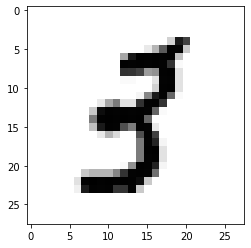

In [16]:
#### 파일이 너무 크기때문에 epoch와 batch를 사용한다. 
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)


#### graph 
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())    
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("----- Learning finished -----")

    
# Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )   
    
    
# Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    
# 실제 값을 그림으로 출력한다.     
    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()